In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_years = [0]*5
df_years[0] = pd.read_csv(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\CO_NO\gt_2011.csv', encoding='utf-8', delimiter=',')
df_years[1] = pd.read_csv(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\CO_NO\gt_2012.csv', encoding='utf-8', delimiter=',')
df_years[2] = pd.read_csv(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\CO_NO\gt_2013.csv', encoding='utf-8', delimiter=',')
df_years[3] = pd.read_csv(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\CO_NO\gt_2014.csv', encoding='utf-8', delimiter=',')
df_years[4] = pd.read_csv(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\CO_NO\gt_2015.csv', encoding='utf-8', delimiter=',')
df = pd.concat(df_years,  keys = [11,12,13,14,15])
# [len(df_years[i]) for i in range(len(df_years))]
df.loc[13].head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


<Axes: >

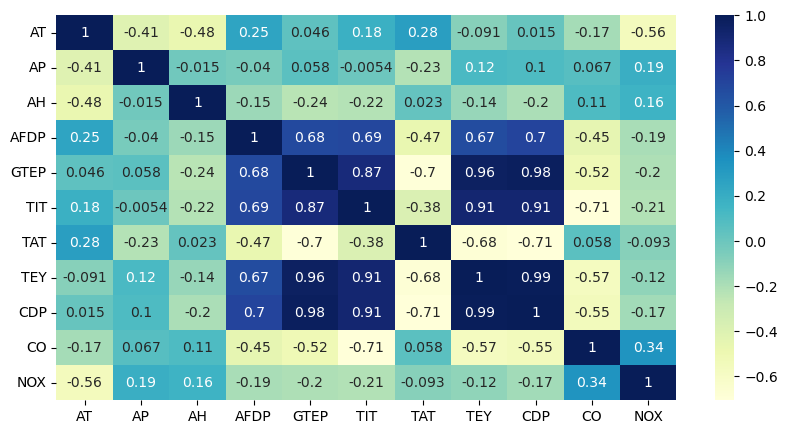

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 


In [4]:
df_headers = [v for v in df.columns.values]
df_headers
df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
11 0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
   1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
   2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
   3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
   4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   
...         ...     ...     ...     ...     ...     ...     ...     ...   
15 7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08   
   7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79   
   7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81   
   7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41   
   7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41   

            CDP  
11 0     11.898  
   1     11.892  
   2     12.042  
   3     11.990  
   4     11.910  
...         ...  
15 7379  10.411  
   7380  10.344  
   7381  10.462  
   7382  11.771  
   7383  11.462  

[36733 rows x 9 columns]

#### Разделим параметры:
#### 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'  в X
#### 'CO', 'NOX' в y

In [5]:
X = df[df_headers[:-2]]
X.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP
11 0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898
   1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892
   2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042
   3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990
   4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910

In [6]:
y = df[df_headers[-2:]]
y.head()

CO     NOX
11 0  0.32663  81.952
   1  0.44784  82.377
   2  0.45144  83.776
   3  0.23107  82.505
   4  0.26747  82.028

In [7]:
X.loc[[14, 15]]

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
14 0     8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16   
   1     9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51   
   2     9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96   
   3     9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83   
   4     9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56   
...         ...     ...     ...     ...     ...     ...     ...     ...   
15 7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08   
   7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79   
   7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81   
   7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41   
   7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41   

            CDP  
14 0     11.381  
   1     11.476  
   2     11.555  
   3     11.539  
   4     11.484  
...         ...  
15 7379  10.411  
   7380  10.344  
   7381  10.462  
   7382  11.771  
   7383  11.462  

[14542 rows x 9 columns]

#### Нормируем и разобьем на обучающую и тестовую по (2014,2015)

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np

##### Посмотрим на то, какие значения лежали раньше в X, и на то, какие стали после нормировки. 
##### y заменим по принципу >4.5 =>1; <4.5 => 0

In [9]:
X = X.loc[[14, 15]]
y = y.loc[[14, 15]]
y_co_mask = y.CO > 4.5
y_co = y[['CO']].copy()
y_co[y_co["CO"] <= 4.5] = -1
y_co[y_co["CO"] > 4.5] = 1
y_co
y_co_ = y_co.rename(columns={"CO": "CO_"})
y_no = y[['NOX']].copy()
# changing value NOX
# y_no[y_no["NOX"] <= 4.5] = -1
# y_no[y_no["NOX"] > 4.5] = 1
y_no_ = y_no.rename(columns={"NOX": "NOX_"})
concated_y  = pd.concat([y,  y_co_, y_no_], axis = 1)
concated_y[concated_y.CO >4.5].head(), concated_y[concated_y.CO <=4.5].head(), 
# concated_y.loc[concated_y.CO == 1]

(             CO      NOX  CO_     NOX_
 14 47    9.0655   92.735  1.0   92.735
    102   5.6683   83.237  1.0   83.237
    104  10.5050   98.087  1.0   98.087
    105  12.5670  111.250  1.0  111.250
    118   9.7846   96.764  1.0   96.764,
           CO     NOX  CO_    NOX_
 14 0  1.9157  68.292 -1.0  68.292
    1  2.0596  68.610 -1.0  68.610
    2  2.1621  68.324 -1.0  68.324
    3  2.1214  67.619 -1.0  67.619
    4  2.1549  66.499 -1.0  66.499)

#### Посмотрим сколько у нас процентов данных с аномальными (>4.5 CO) выбросами

In [10]:
print(f"Количество данных с выбросами: {y_co.loc[y_co.CO == 1].shape[0]}, Без: {y_co.shape[0]}")
print(f"Доля результатов с выбросами: {y_co.loc[y_co.CO == 1].shape[0]/y_co.shape[0]}")

Количество данных с выбросами: 1600, Без: 14542
Доля результатов с выбросами: 0.11002613120616146


In [11]:
y_co

CO
14 0    -1.0
   1    -1.0
   2    -1.0
   3    -1.0
   4    -1.0
...      ...
15 7379  1.0
   7380  1.0
   7381  1.0
   7382 -1.0
   7383  1.0

[14542 rows x 1 columns]

In [12]:
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
14 0     8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16   
   1     9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51   
   2     9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96   
   3     9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83   
   4     9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56   
...         ...     ...     ...     ...     ...     ...     ...     ...   
15 7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08   
   7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79   
   7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81   
   7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41   
   7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41   

            CDP  
14 0     11.381  
   1     11.476  
   2     11.555  
   3     11.539  
   4     11.484  
...         ...  
15 7379  10.411  
   7380  10.344  
   7381  10.462  
   7382  11.771  
   7383  11.462  

[14542 rows x 9 columns]

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X__df = pd.DataFrame(X_, columns = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])
X__df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,-1.169710,1.335005,1.575988,-0.752769,-0.678333,-0.624630,0.550455,-0.487407,-0.648407
1,-1.141105,1.273884,1.488833,-0.803929,-0.664947,-0.602727,0.523004,-0.464036,-0.557822
2,-1.115610,1.197483,1.423701,-0.807310,-0.643286,-0.569871,0.540651,-0.433986,-0.482493
3,-1.098112,1.136362,1.384623,-0.791433,-0.602154,-0.509636,0.550455,-0.375891,-0.497750
4,-1.072222,1.121081,1.351050,-0.829803,-0.665434,-0.591775,0.528886,-0.460697,-0.550194
...,...,...,...,...,...,...,...,...,...
14537,-1.856042,2.297660,1.202524,-0.864644,-1.667690,-2.294788,-1.086771,-1.627946,-1.573327
14538,-1.784813,2.312940,1.258657,-0.826127,-1.684970,-2.261932,-0.951479,-1.647311,-1.637213
14539,-1.611603,2.297660,1.338091,-0.648980,-1.723668,-2.240028,-0.716189,-1.712751,-1.524697
14540,-1.558675,2.328221,1.269669,0.336430,-0.578302,-0.109893,0.583787,-0.136832,-0.276532


In [14]:
# y_co.to_numpy()
# X_
y_co_np = y_co.to_numpy().ravel()
len(y_co_np), len(X_)

(14542, 14542)

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X_, y_co_np, test_size=0.3, random_state=21)

### Для начала проверим weight = uniform

In [16]:
model = KNeighborsClassifier(weights = "uniform")
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Значений тесто всего: {len(predictions)}")
print(f"Выбросов всего: {len([i for i in y_test  if i == 1])}")
print(f"Нормальных значений всего: {len([i for i in y_test  if i == -1])}")
print(f"Предсказанных выбросов всего: {len([i for i in predictions  if i == 1])}")
print(f"Предсказанных нормальных значений всего: {len([i for i in predictions  if i == -1])}")

Значений тесто всего: 4363
Выбросов всего: 464
Нормальных значений всего: 3899
Предсказанных выбросов всего: 417
Предсказанных нормальных значений всего: 3946


### Оценка метрик нашей модели

Accuracy = 0.9676827870731148
Precision =  [0.97617841 0.88729017]
recall =  [0.98794563 0.79741379]
f1 =  [0.98202677 0.8399546 ]
fbeta =  [0.98556954 0.81390233]


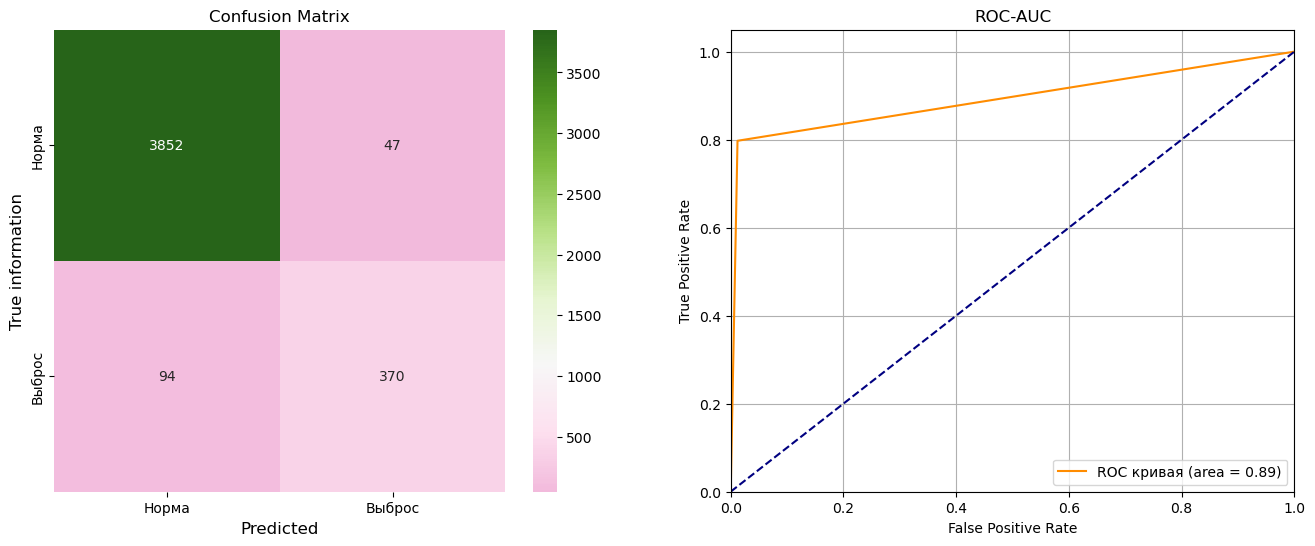

array([[3852,   47],
       [  94,  370]], dtype=int64)

In [17]:
from matplotlib import cm as pltcm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def draw_all(y_test, predictions):
    plt.figure(figsize=(16, 6))
    print("Accuracy =", metrics.accuracy_score(predictions, y_test))
    print("Precision = ",metrics.precision_score(y_test, predictions, average = None))
    print("recall = ",metrics.recall_score(y_test, predictions, average = None))
    print("f1 = ",metrics.f1_score(y_test, predictions, average = None))
    print("fbeta = ",metrics.fbeta_score(y_test, predictions, beta = 2, average = None))
    plt.subplot(121)
    cm = (metrics.confusion_matrix(y_test, predictions))
    cols = ["Норма", "Выброс"]
    cmdf = pd.DataFrame(cm, columns = cols, index = cols)
    sns.heatmap(cmdf, annot = True, cmap = pltcm.PiYG, fmt = '', center = np.mean(np.array(cm)))
    plt.title("Confusion Matrix")
    plt.ylabel("True information", size = "large")
    plt.xlabel("Predicted", size = "large");
    
    fpr, tpr, treshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
    return cm

draw_all(y_test, predictions)

In [18]:
def plot_roc_auc(y_test, predictions):
    fpr, tpr, treshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

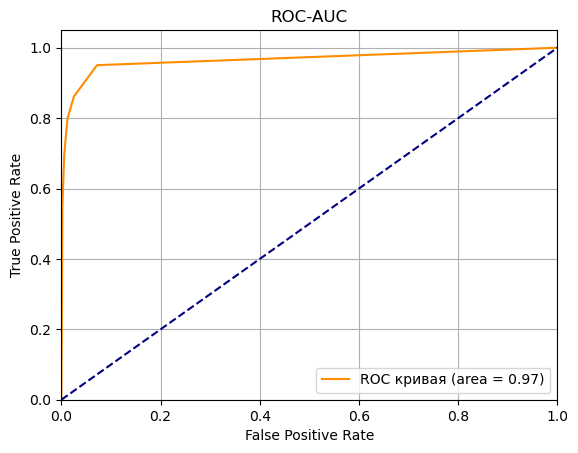

In [19]:
predicted_proba = model.predict_proba(X = X_test)

plot_roc_auc(y_test, predicted_proba[:,1])
# predicted_proba[:,1], y_test

In [20]:
predicted_proba[:50]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2]])

### weight = distance

In [21]:
model = KNeighborsClassifier(weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Значений тесто всего: {len(predictions)}")
print(f"Выбросов всего: {len([i for i in y_test  if i == 1])}")
print(f"Нормальных значений всего: {len([i for i in y_test  if i == -1])}")
print(f"Предсказанных выбросов всего: {len([i for i in predictions  if i == 1])}")
print(f"Предсказанных нормальных значений всего: {len([i for i in predictions  if i == -1])}")

Значений тесто всего: 4363
Выбросов всего: 464
Нормальных значений всего: 3899
Предсказанных выбросов всего: 411
Предсказанных нормальных значений всего: 3952


Accuracy = 0.9699747879899152
Precision =  [0.97672065 0.90510949]
recall =  [0.98999744 0.80172414]
f1 =  [0.98331423 0.85028571]
fbeta =  [0.98731328 0.82046758]


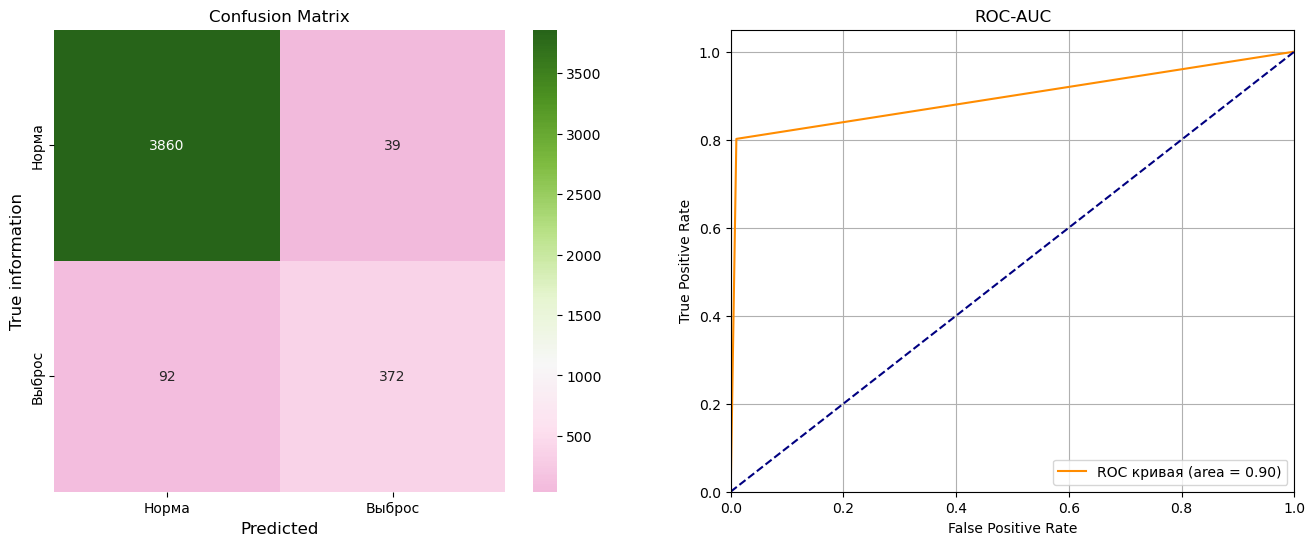

array([[3860,   39],
       [  92,  372]], dtype=int64)

In [22]:
draw_all(y_test, predictions)

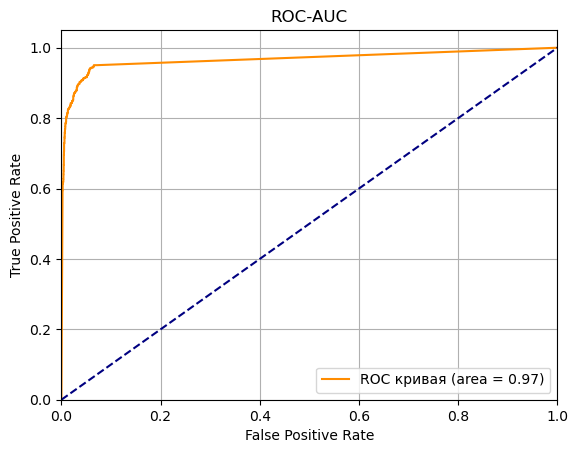

In [23]:
# Roc кривая построенная по вероятности отнесения к классу.
predicted_proba = model.predict_proba(X = X_test)
plot_roc_auc(y_test , predicted_proba[:,1] )

In [30]:
predicted_proba[:100]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.51117503, 0.48882497],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.89500838, 0.10499162],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

### Теперь построим кросс-валидацию, подбирать будем разные k

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, shuffle = True, random_state = 21)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[    1     4     5 ... 14538 14539 14541]
  Test:  index=[    0     2     3 ... 14534 14535 14540]
Fold 1:
  Train: index=[    0     2     3 ... 14534 14535 14540]
  Test:  index=[    1     4     5 ... 14538 14539 14541]


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
f3_scorer = make_scorer(fbeta_score, beta=3)

model = KNeighborsClassifier(weights='distance')
parameters = {'weights':('uniform', 'distance'), 'n_neighbors' : [3,5,7,9]}
# scorer = metrics.fbeta_score(beta = 3, average = "binary") # Выбираем f_beta с гамма 3 чтобы максимизировать ситуации, когда у нас все выбросы классифицируются как выбросы. Норма менее важна
# scorer
clf = GridSearchCV(model, parameters, scoring = f3_scorer, cv = 10)
clf.fit(X_, y_co_np)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ('uniform', 'distance')},
             scoring=make_scorer(fbeta_score, beta=3))

In [26]:
clf.cv_results_


{'mean_fit_time': array([0.02666481, 0.03347075, 0.03269918, 0.03373408, 0.03530796,
        0.03394573, 0.03468173, 0.03444273]),
 'std_fit_time': array([0.00962456, 0.00213623, 0.00256431, 0.00179633, 0.0027135 ,
        0.00212645, 0.00176177, 0.00242035]),
 'mean_score_time': array([0.14095101, 0.09146008, 0.1897866 , 0.10364611, 0.19715652,
        0.11278255, 0.20843029, 0.12233546]),
 'std_score_time': array([0.05213856, 0.01322387, 0.0168362 , 0.01677096, 0.01918499,
        0.01465759, 0.02244552, 0.01541768]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7, 9, 9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),


In [27]:
clf.best_score_, clf.best_estimator_, clf.best_params_

(0.6801131828313114,
 KNeighborsClassifier(n_neighbors=9),
 {'n_neighbors': 9, 'weights': 'uniform'})

### Парзеновское окно

In [28]:
import numpy as np
 
def parzen_window(x_train, y_train, x_test, h, window_func):
    n_train = len(x_train)
    n_test = len(x_test)
    classes = np.unique(y_train)
    n_classes = len(classes)
    pred_labels = []

    for i in range(n_test):
        x = x_test[i]
        distances = []

        for j in range(n_train):
            dist = np.linalg.norm(x - x_train[j])
            distances.append((dist, y_train[j]))

            distances.sort(key=lambda x: x[0])
            window_values = [window_func(dist / h) for dist, _ in distances] # как бы маска
            class_scores = {c: 0 for c in classes}

        for k in range(n_train):
            dist, label = distances[k]
            class_scores[label] += window_values[k]

        pred_label = max(class_scores, key=class_scores.get)
        pred_labels.append(pred_label)

    return pred_labels
 
# Пример использования функции парзеновского окна для классификации
x_train = np.array([[2, 4], [3, 5], [1, 3], [5, 1], [6, 2], [4, 7]])
y_train = np.array(['яблоко', 'яблоко', 'яблоко', 'апельсин', 'апельсин', 'апельсин'])
x_test = np.array([[1, 5], [4, 3]])
 
# Вывод результата классификации
print(parzen_window(x_train, y_train, x_test, h=2, window_func=lambda x: 1 if x <= 1 else 0))

def window_func_gauss(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

print(parzen_window(x_train, y_train, x_test, h=2, window_func=window_func_gauss))

con_train = pd.DataFrame(pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis = 1), columns=['f','s'])
X_test = pd.DataFrame(x_train, columns=['f','s'])
sns.scatterplot(data=x_train, x="f", y="s", hue = "target")
sns.scatterplot(data=y_train, x="f", y="s", hue = "target")
# Вывод: ['яблоко', 'апельсин']

['яблоко', 'апельсин']
['яблоко', 'яблоко']


C:\Users\Андрей\AppData\Local\Temp\ipykernel_30632\1458882779.py:44: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  con_train = pd.DataFrame(pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis = 1), columns=['f','s'])


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:

sns.scatterplot(data=x_train[y_train=='яблоко'], color = 'r', legend = 'яблоки')
sns.scatterplot(data=x_train[y_train=='апельсин'], color = 'r', legend = 'апельсины')

In [ ]:
class_scores = {0: 2, 3: 4}
pred_label = max(class_scores, key=class_scores.get)
pred_label